<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/ML_Health_and_Medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Load Modules

In [159]:
!pip install -q missingpy import_ipynb

In [160]:
# utils
import os, sys, warnings, itertools
import import_ipynb
import tarfile
import pandas as pd
import numpy as np
from six.moves import urllib
# colab
from google.colab import drive
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score)
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.manifold import MDS
# vis
import seaborn as sns
import matplotlib.pyplot as plt

### Settings

In [161]:
warnings.filterwarnings('ignore')

In [162]:
%matplotlib inline

In [163]:
# mount google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
working_path = os.path.abspath(os.path.join("/content/drive/MyDrive/Jupyter Notebooks/"))
os.chdir(working_path)

In [165]:
if working_path not in sys.path:
    sys.path.append(working_path)

In [166]:
# load MachineLearningUtils
from MachineLearningUtils import *

## Understand Data

### Summarize Data

In [167]:
data_dir = "./Inputs"
csv_path = os.path.join(data_dir, "support2.csv")
data = pd.read_csv(csv_path)

In [168]:
reduce_memory_usage(df=data, category=True)

Memory usage of dataframe is 3.334473 MB!
Memory usage after optimization is 0.774438 MB!
Decreased by 76.8%


In [169]:
summarize_columns(data)

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,row_id,int16,0,0.0,9105,1,2,3
1,age,float16,0,0.0,1778,62.84375,60.34375,52.75
2,death,int8,0,0.0,2,0,1,1
3,sex,category,0,0.0,2,male,female,female
4,hospdead,int8,0,0.0,2,0,1,0
5,slos,int16,0,0.0,167,5,4,17
6,d_time,int16,0,0.0,1724,2029,4,47
7,dzgroup,category,0,0.0,8,Lung Cancer,Cirrhosis,Cirrhosis
8,dzclass,category,0,0.0,4,Cancer,COPD/CHF/Cirrhosis,COPD/CHF/Cirrhosis
9,num_co,int8,0,0.0,10,0,2,2


In [170]:
data.drop(["row_id"], axis=1, inplace=True)

In [171]:
display_df(data)

Dataframe:  
num_rows = 9,105 
num_cols = 47


,age,death,sex,hospdead,slos,d_time,dzgroup,dzclass,num_co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,62.84375,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.200195,141.0,7.460938,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,60.34375,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,52.75000,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.460938,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,42.37500,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799805,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,79.87500,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799805,143.0,7.511719,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       9105 non-null   float16 
 1   death     9105 non-null   int8    
 2   sex       9105 non-null   category
 3   hospdead  9105 non-null   int8    
 4   slos      9105 non-null   int16   
 5   d_time    9105 non-null   int16   
 6   dzgroup   9105 non-null   category
 7   dzclass   9105 non-null   category
 8   num_co    9105 non-null   int8    
 9   edu       7471 non-null   float16 
 10  income    6123 non-null   category
 11  scoma     9104 non-null   float16 
 12  charges   8933 non-null   float32 
 13  totcst    8217 non-null   float32 
 14  totmcst   5630 non-null   float32 
 15  avtisst   9023 non-null   float16 
 16  race      9063 non-null   category
 17  sps       9104 non-null   float16 
 18  aps       9104 non-null   float16 
 19  surv2m    9104 non-null   float16 
 20  su

### Handle Integer Data Type

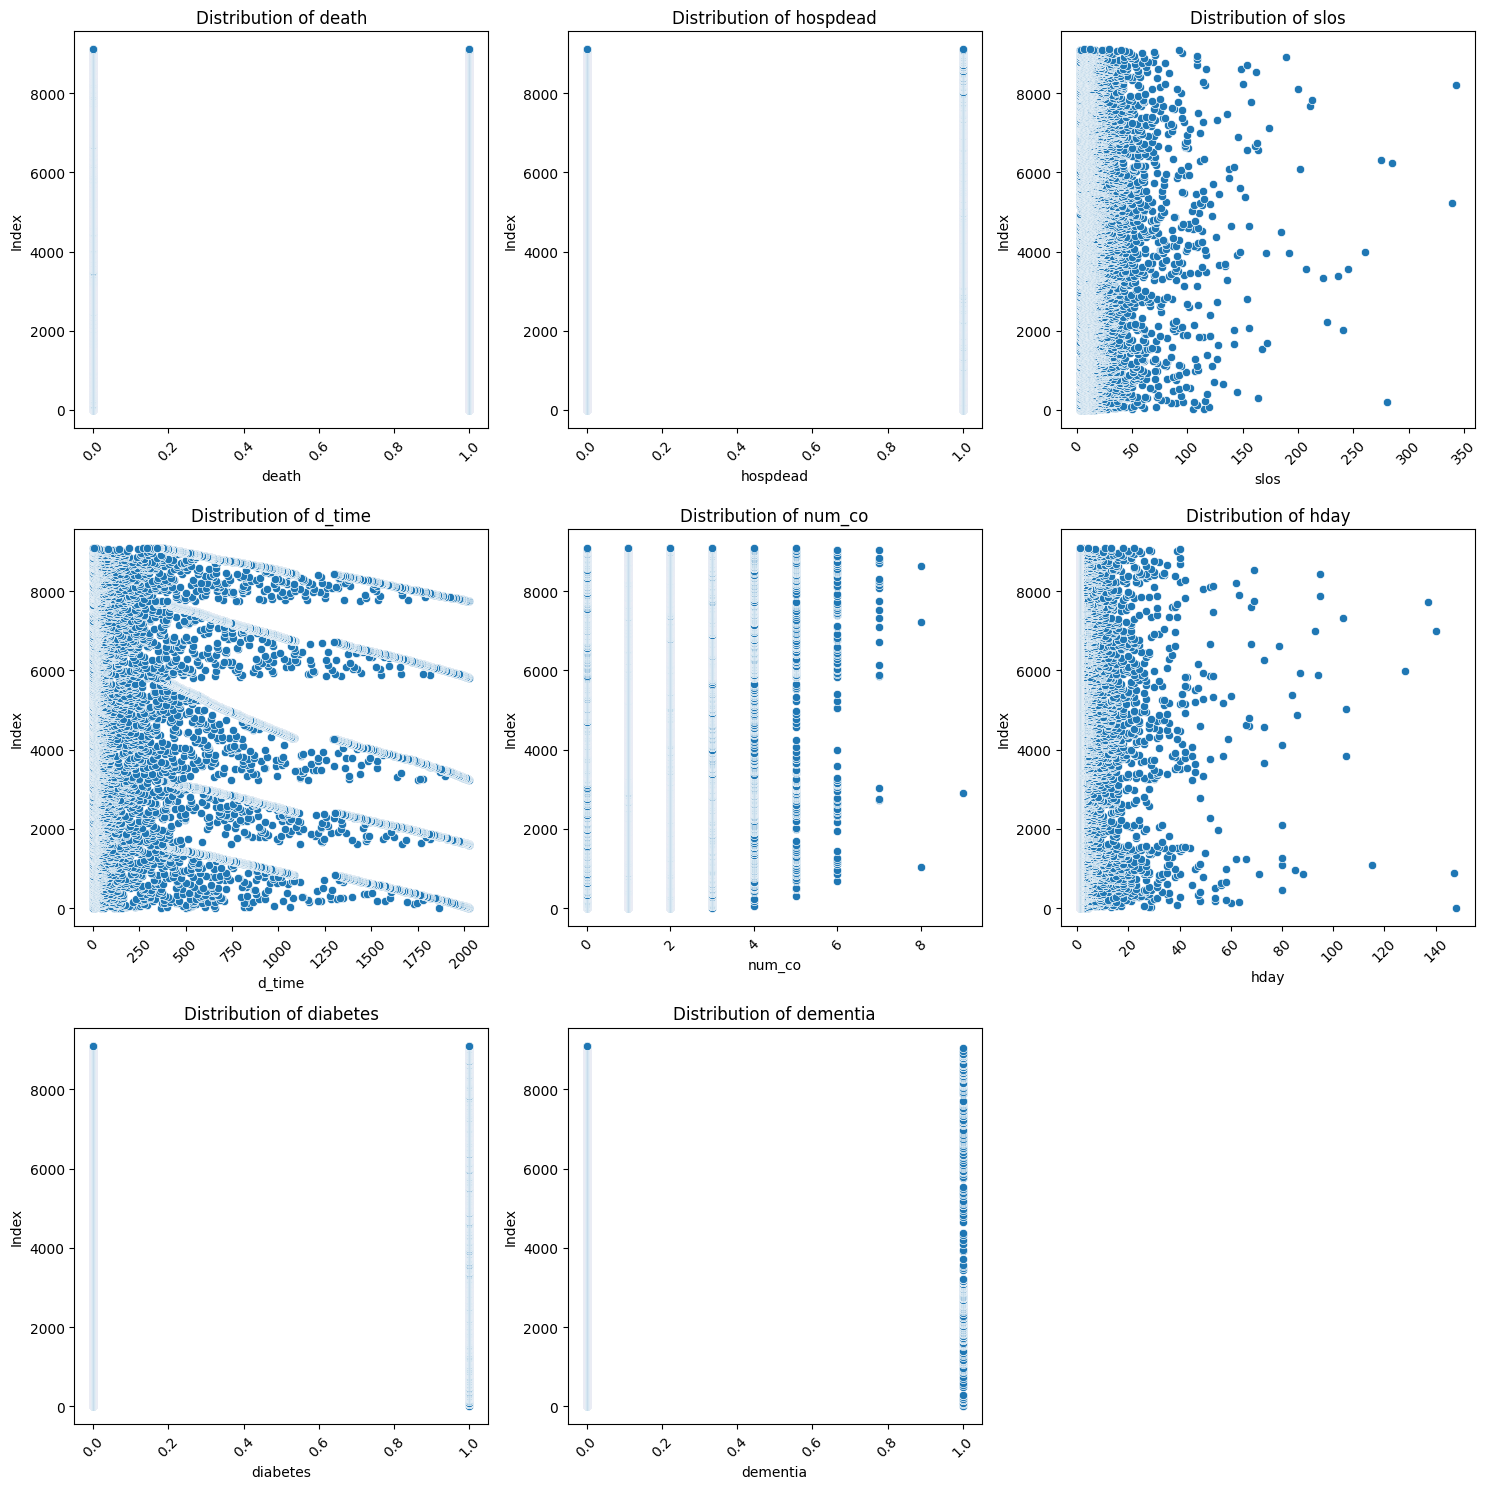

In [172]:
int_columns = data.select_dtypes(include=['int8', 'int16']).columns.tolist()
scatter_plot_vars(df=data, vars_to_plot=int_columns, num_cols=3)

In [173]:
int_cts_columns = data.select_dtypes(include=['int16']).columns.tolist()
int_cat_columns = data.select_dtypes(include=['int8']).columns.tolist()
int_cts_columns, int_cat_columns

(['slos', 'd_time', 'hday'],
 ['death', 'hospdead', 'num_co', 'diabetes', 'dementia'])

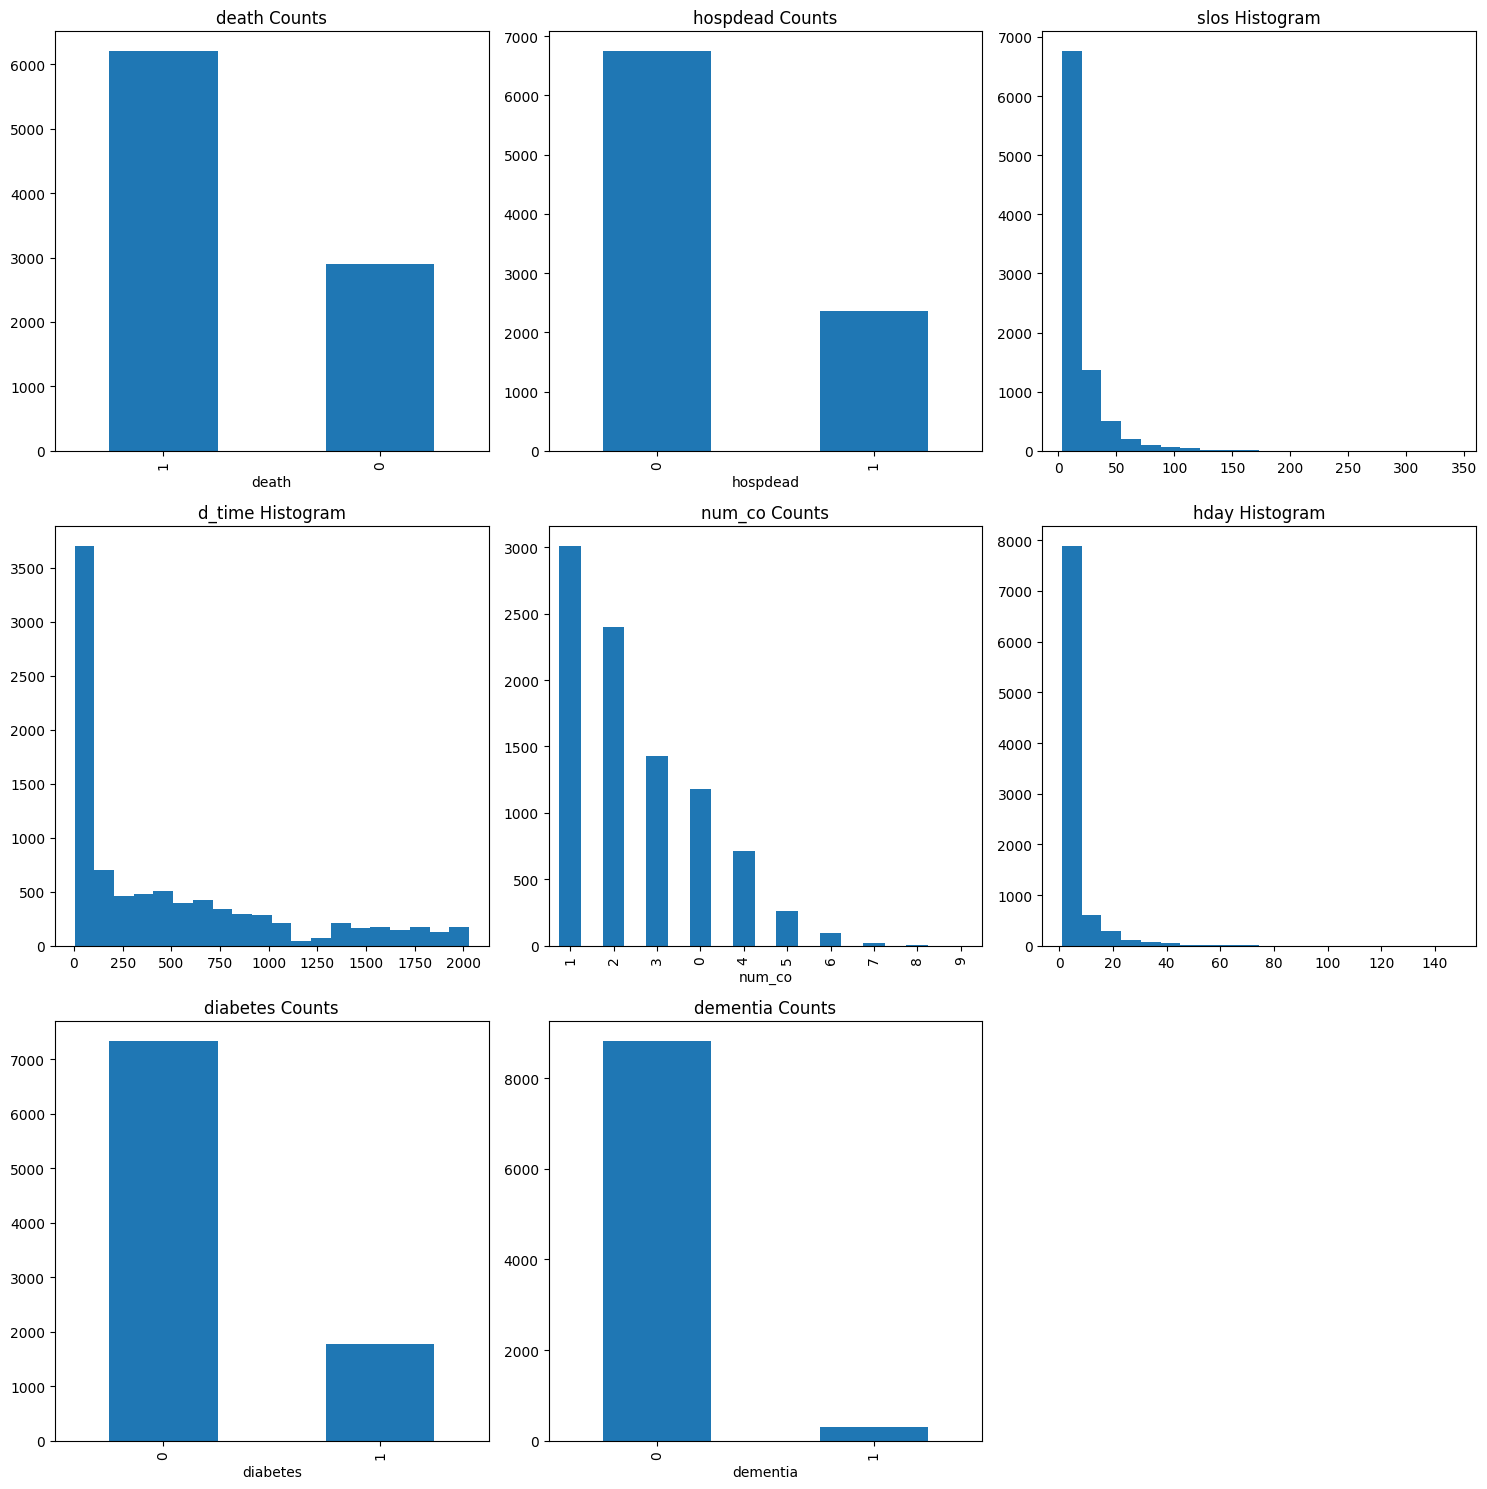

In [174]:
plot_variables(df=data, vars_to_plot=int_columns, cts_vars=int_cts_columns,
              num_cols=3, hist_num_bins=20)

### Categorize Features

In [175]:
cols = list(data.columns)
categorical_features = data.select_dtypes(include='category').columns.tolist()
numerical_features = list(set(cols) - set(categorical_features) - set(int_columns))

### Missing Data

<Axes: xlabel='Num_missed_values'>

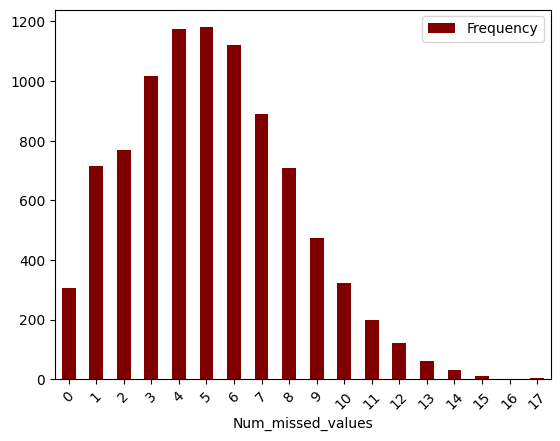

In [176]:
def count_rows_with_missing_values(dataframe):
    missing_values_per_row = data.isnull().sum(axis=1)
    _bins = np.arange(int(min(missing_values_per_row)), int(max(missing_values_per_row)) + 1)
    hist_values, bins = np.histogram(missing_values_per_row, bins=_bins)
    bins_percent = [_ for _ in bins]
    hist_df = pd.DataFrame({'Num_missed_values': bins_percent[:-1], 'Frequency': hist_values})
    return hist_df
result = count_rows_with_missing_values(data)
result.plot.bar(x='Num_missed_values', y='Frequency', rot=45, width=0.5, color='maroon')

### Pipeline for Preprocessing

In [177]:
num_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                               ("std_scaler", StandardScaler())
                               ]
                       )
cat_pipeline = Pipeline(steps=[("cat_imputer", SimpleImputer(strategy="most_frequent")),
                               ("one_hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
                              ]
                       )

int_pipeline = Pipeline(steps=[("int_imputer", SimpleImputer(strategy="most_frequent"))]
                       )

data_processor_pipeline = ColumnTransformer([("num", num_pipeline, numerical_features),
                                             ("int_cts", num_pipeline, int_cts_columns),
                                             ("int_cat", num_pipeline, int_columns),
                                             ("cat", cat_pipeline, categorical_features)
                                            ]
                                           )
_df = data_processor_pipeline.fit_transform(data)

In [178]:
attribs = list(data_processor_pipeline.get_feature_names_out())
df = pd.DataFrame(_df, columns=attribs)

In [179]:
summarize_columns(df)

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,num__age,float64,0,0.0,1778,0.012370,-0.147958,-0.634956
1,num__edu,float64,0,0.0,31,-0.253801,0.066262,0.066262
2,num__adlp,float64,0,0.0,8,5.415486,-0.363698,0.461899
3,num__wblc,float64,0,0.0,499,-0.688514,0.522392,-0.415634
4,num__dnrday,float64,0,0.0,177,-0.480304,-0.279428,0.122324
...,...,...,...,...,...,...,...,...
71,cat__sfdm2_<2 mo. follow-up,float64,0,0.0,2,1.000000,1.000000,1.000000
72,cat__sfdm2_Coma or Intub,float64,0,0.0,2,0.000000,0.000000,0.000000
73,cat__sfdm2_SIP>=30,float64,0,0.0,2,0.000000,0.000000,0.000000
74,cat__sfdm2_adl>=4 (>=5 if sur),float64,0,0.0,2,0.000000,0.000000,0.000000


## Model Developement

### Define Train, Validate and Test Scope

In [180]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [181]:
display_df(train_df)

Dataframe:  
num_rows = 7,284 
num_cols = 76


,num__age,num__edu,num__adlp,num__wblc,num__dnrday,num__ph,num__scoma,num__adls,num__hrt,num__totmcst,...,cat__ca_no,cat__ca_yes,cat__dnr_dnr after sadm,cat__dnr_dnr before sadm,cat__dnr_no dnr,cat__sfdm2_<2 mo. follow-up,cat__sfdm2_Coma or Intub,cat__sfdm2_SIP>=30,cat__sfdm2_adl>=4 (>=5 if sur),cat__sfdm2_no(M2 and SIP pres)
877,-1.176065,0.706389,-0.363698,-0.808752,0.021886,0.068385,-0.489448,-0.768129,-0.068356,0.049564,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7877,1.008411,0.706389,-0.363698,-0.732004,-0.681180,-0.659004,-0.489448,-0.233475,0.533751,-0.435242,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
196,-1.937626,-0.253801,-0.363698,0.479754,13.380124,1.355304,1.012522,2.974453,-0.036666,-0.274810,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8870,0.787959,-1.213991,-0.363698,-0.022516,-0.279428,-0.267333,-0.124104,-0.768129,-1.811298,0.297245,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4606,-0.061782,-1.213991,-0.363698,-0.328653,-0.480304,0.739821,-0.489448,2.974453,1.199238,-0.607007,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7284 entries, 877 to 7270
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num__age                         7284 non-null   float64
 1   num__edu                         7284 non-null   float64
 2   num__adlp                        7284 non-null   float64
 3   num__wblc                        7284 non-null   float64
 4   num__dnrday                      7284 non-null   float64
 5   num__ph                          7284 non-null   float64
 6   num__scoma                       7284 non-null   float64
 7   num__adls                        7284 non-null   float64
 8   num__hrt                         7284 non-null   float64
 9   num__totmcst                     7284 non-null   float64
 10  num__crea                        7284 non-null   float64
 11  num__surv6m                      7284 non-null   float64
 12  num__glucose     

In [182]:
sample_train_df = train_df.sample(frac=0.2)

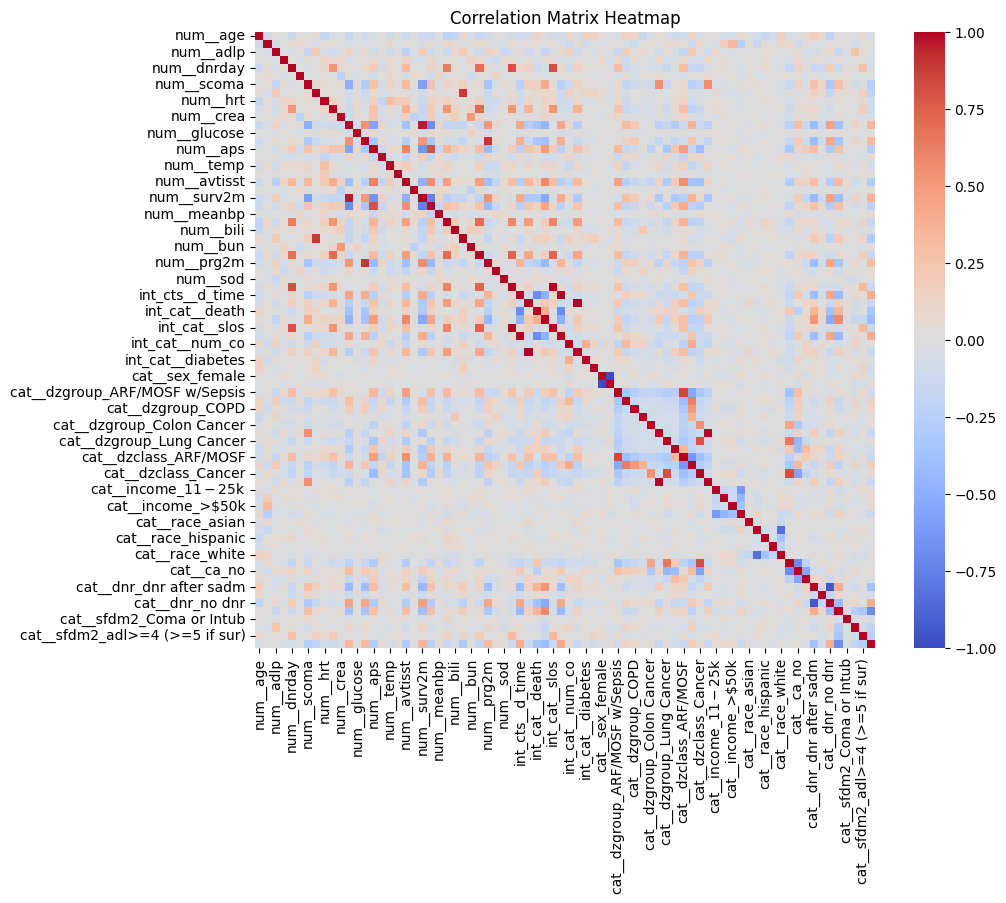

In [183]:
corr_matrix = sample_train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [184]:
corr_matrix["num__charges"].sort_values(ascending=False)

,num__charges
num__charges,1.000000
num__totcst,0.709984
num__dnrday,0.625907
int_cts__slos,0.598877
int_cat__slos,0.598877
...,...
num__surv6m,-0.186820
cat__dzclass_Cancer,-0.202990
num__age,-0.206415
cat__dzclass_COPD/CHF/Cirrhosis,-0.229857


<Axes: >

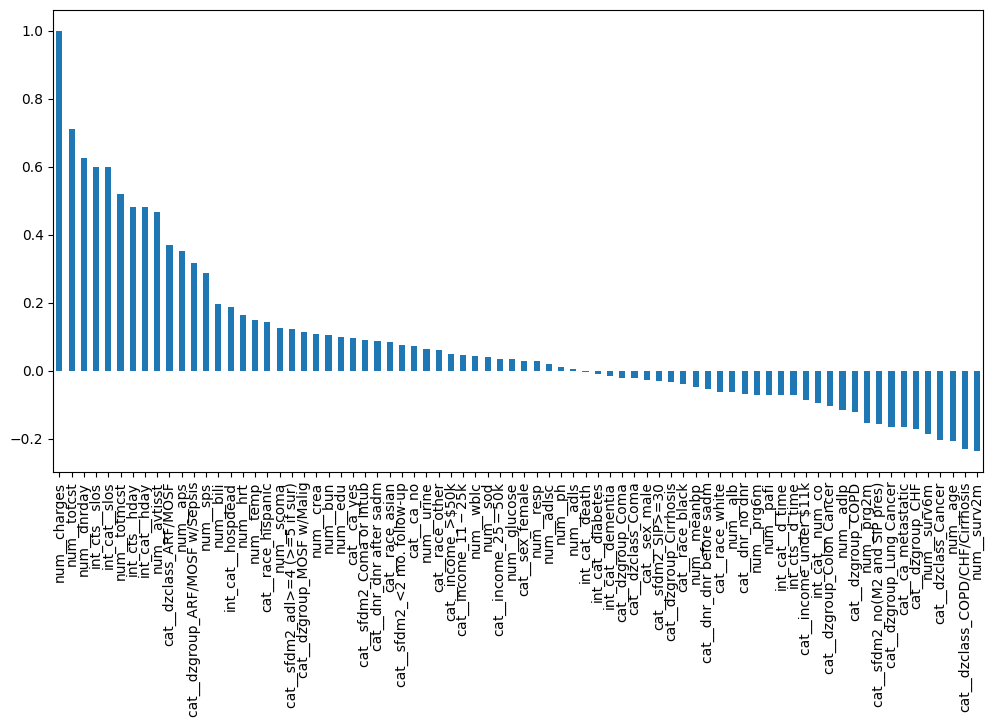

In [185]:
corr_matrix["num__charges"].sort_values(ascending=False).plot.bar(figsize=(12,6))

In [186]:
y = train_df[["num__charges"]]
X = train_df.drop("num__charges", axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
X_test = test_df.drop("num__charges", axis=1).to_numpy()
y_test = test_df[["num__charges"]].to_numpy()

### Define Models

In [187]:
def eval_reg_model(X_data, X_test, y_data, y_test, model):
    model.fit(X_data, y_data)
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    model_name = type(model).__name__
    print("model: {},  rmse = {:.2f}, mae = {:.2f}, r2 = {:.2f}".format(model_name, rmse, mae, r2))

In [188]:
eval_reg_model(X_train, X_valid, y_train, y_valid, LinearRegression())
eval_reg_model(X_train, X_valid, y_train, y_valid, DecisionTreeRegressor())
eval_reg_model(X_train, X_valid, y_train, y_valid, SVR(kernel="linear"))
eval_reg_model(X_train, X_valid, y_train, y_valid, RandomForestRegressor())

model: LinearRegression,  rmse = 0.56, mae = 0.27, r2 = 0.60
model: DecisionTreeRegressor,  rmse = 0.84, mae = 0.22, r2 = 0.09
model: SVR,  rmse = 0.59, mae = 0.18, r2 = 0.56
model: RandomForestRegressor,  rmse = 0.50, mae = 0.16, r2 = 0.68


### Cross Validation

In [189]:
search_space = {
    "n_estimators": [100, 200],
    "max_features": [4, 6],
    "max_depth": [4, 5]
}
forest_reg = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=forest_reg, param_grid=search_space,
                           cv=5, scoring="r2", return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
eval_reg_model(X_train, X_valid, y_train, y_valid, grid_search.best_estimator_)

{'max_depth': 5, 'max_features': 6, 'n_estimators': 200}
RandomForestRegressor(max_depth=5, max_features=6, n_estimators=200,
                      random_state=0)
0.5849269155646014
model: RandomForestRegressor,  rmse = 0.58, mae = 0.27, r2 = 0.58


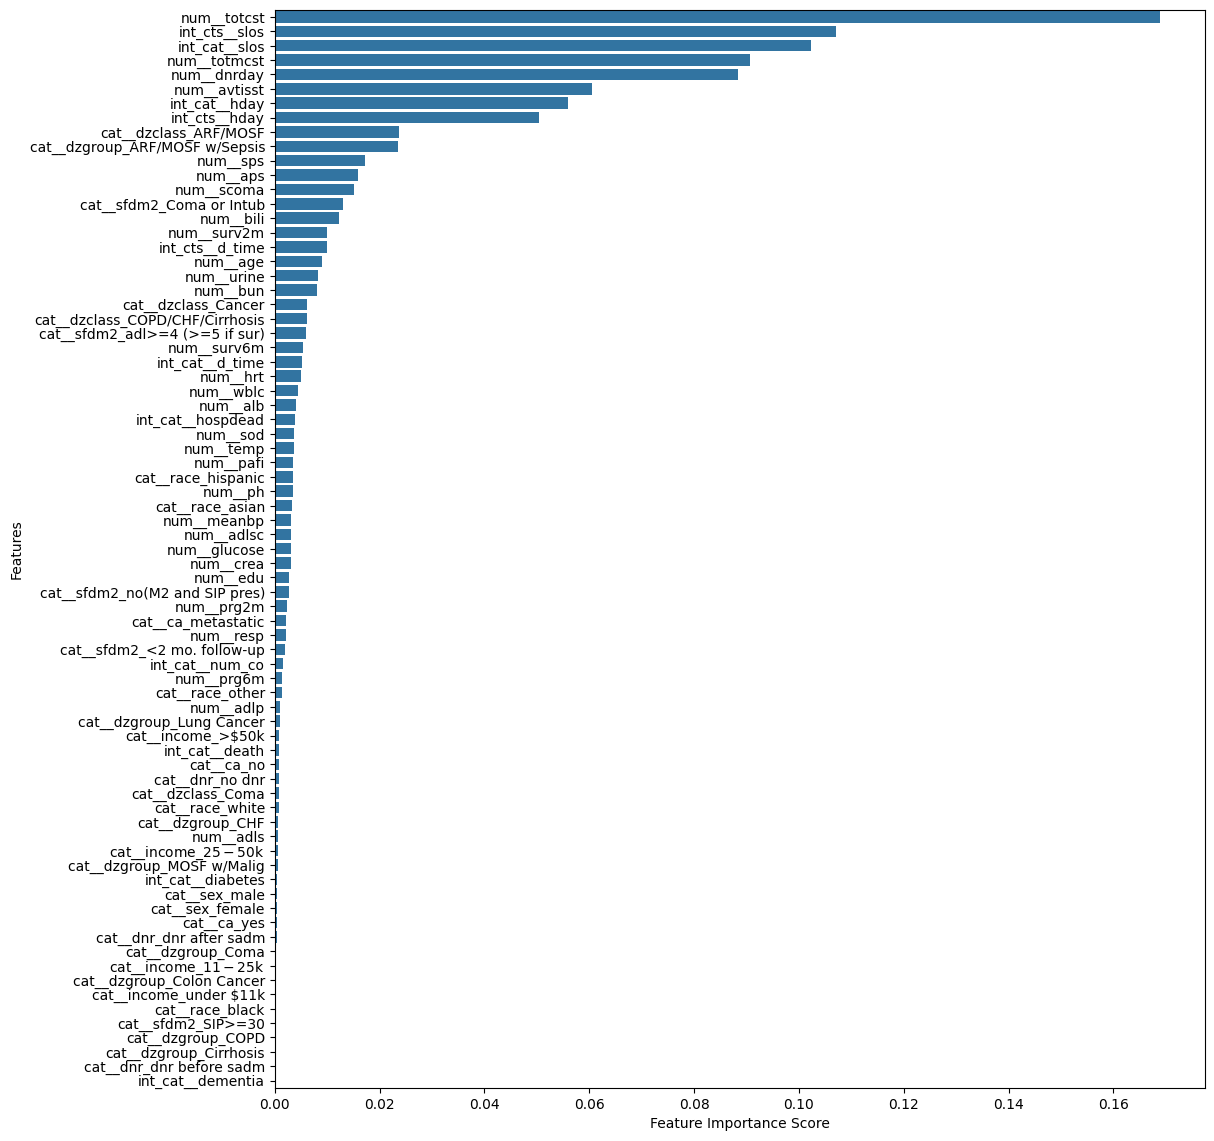

In [190]:
attribs.remove("num__charges")
feature_importances = grid_search.best_estimator_.feature_importances_
feature_imp = pd.Series(feature_importances, index= attribs).sort_values(ascending=False)
plt.figure(figsize=(12, 14))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

### Prediction and Validation

In [191]:
y_pred = grid_search.predict(X_test)

In [192]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.29333883435035746
RMSE: 0.5416076387481601
MAE: 0.27280988879985435
R2: 0.6597386548195966


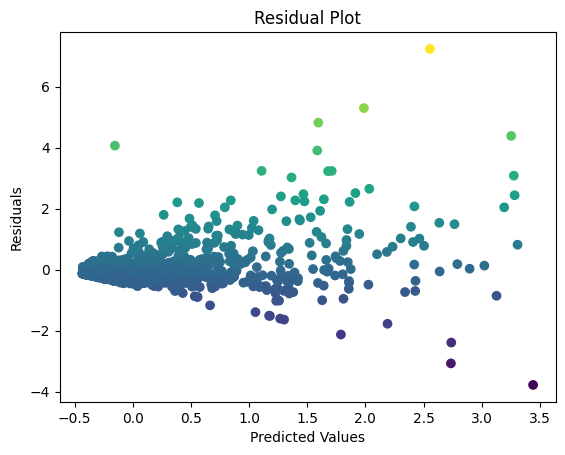

In [193]:
residuals = y_test.flatten() - y_pred
plt.scatter(y_pred, residuals, c=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [194]:
scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Average R2:", scores.mean())

Cross-validation scores: [0.48571624 0.58559151 0.55935734 0.6115437  0.64400431]
Average R2: 0.577242621887408
